In [40]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas import get_dummies
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [57]:
train_data = pd.read_csv('train.csv')
y = train_data['loan_status']
X = train_data.drop(columns=['loan_status'])
X = pd.get_dummies(X, drop_first=True)

train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


/var/folders/4t/mqyp8dq93vl6c8mgs00qgpbw0000gn/T/ipykernel_30935/1293401228.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


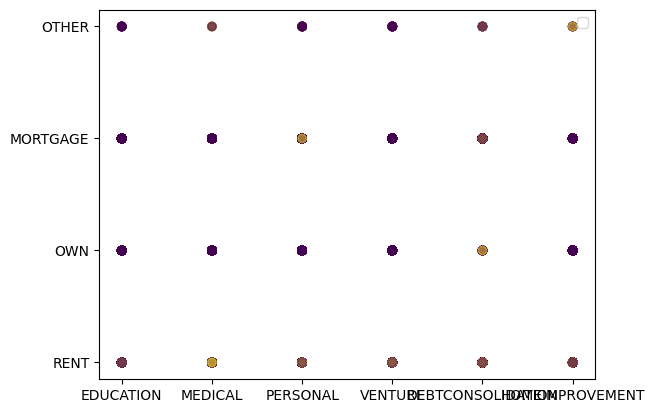

In [69]:
plt.scatter(train_data.loan_intent, train_data.person_home_ownership, c=train_data.loan_status, alpha=.5)
plt.legend()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

classifier = RandomForestClassifier(n_estimators=10)
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))

0.946462063086104


In [35]:
test_data = pd.read_csv('test.csv')
test_data = pd.get_dummies(test_data, drop_first=True)
guesses = classifier.predict(test_data)
print(guesses)

output = pd.DataFrame({"id": test_data.id, "loan_status": guesses})
output.to_csv('output.csv')

[1 0 1 ... 0 0 1]
